## 数据集描述
数据集：Wine Reviews
winemag-data-130k-v2.csv包含13列和130k行葡萄酒评论。

属性列表：
country：葡萄酒来自的国家

description

designation：酿酒厂内的葡萄园，酿造葡萄酒的葡萄来自葡萄园

points：WineEnthusiast对葡萄酒的评分为1-100（尽管他们说他们只对评分> = 80的葡萄酒发表评论）

price：一瓶葡萄酒的成本

province：葡萄酒来自的省或州

region_1：省或州的葡萄种植区（即纳帕）

region_2：有时在葡萄酒种植区域（即纳帕谷内的卢瑟福）中指定了更多特定区域，但此值有时可能为空白

taster_name

taster_twitter_handle

title：葡萄酒评论的标题，如果您对提取该功能感兴趣，通常会包含葡萄酒

variety：用于酿造葡萄酒的葡萄种类（即黑比诺）

winery：制作葡萄酒的酿酒厂

选择有意义的属性，其中，属于标称属性的有：country，designation，province，region_1，region_2，taster_name，taster_twitter_handle，variety，winery；数值属性的有：points，price。

winemag-data_first150k.csv包含10列和150k行葡萄酒评论。

与上一个数据集相比缺少taster_name，taster_twitter_handle，title三个属性。
选择有意义的属性，其中，属于标称属性的有：country，designation，province，region_1，region_2，variety，winery；数值属性的有：points，price。


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
%matplotlib inline

def Nominal(df1):
    resdic = {}
    col1 = df1.country.unique()     #country
    col6 = df1.province.unique()    #province
    col7 = df1.region_1.unique()    #region_1
    col8 = df1.region_2.unique()    #region_2
    col9 = df1.variety.unique()      #variety
    col10 = df1.winery.unique()      #winery
    resdic["country"] = {}
    resdic["province"] = {}
    resdic["region_1"] = {}
    resdic["region_2"] = {}
    resdic["variety"] = {}
    resdic["winery"] = {}

    for each in col1:
        resdic["country"][each] = list(df1.country).count(each)
    for each in col6:
        resdic["province"][each] = list(df1.province).count(each)
    for each in col7:
        resdic["region_1"][each] = list(df1.region_1).count(each)
    for each in col8:
        resdic["region_2"][each] = list(df1.region_2).count(each)
    for each in col9:
        resdic["variety"][each] = list(df1.variety).count(each)
    for each in col10:
        resdic["winery"][each] = list(df1.winery).count(each)
    
    return resdic

## Nominal(dataframe)为处理标称属性的函数
对标称属性，给出每个可能取值的频数。首先按列分别取出各标称属性，然后去重，再对去重后的列表计长度，得到不同属性不同取值的频数，然后对应得存在字典中。按需要可以存到文件中。

In [19]:
def Numeric(Ndf):
    resdic = {}
    describe = Ndf.describe()
    resdic["col4"] = {}
    resdic["col5"] = {}
    print(describe)
    resdic["col4"]["Max"] = describe.points[7]
    resdic["col4"]["Min"] = describe.points[3]
    resdic["col4"]["Mean"] = describe.points[1]
    resdic["col4"]["Mid"] = describe.points[5]
    resdic["col4"]["25"] = describe.points[4]
    resdic["col4"]["75"] = describe.points[6]
    resdic["col4"]["Nan"] = Ndf.points.isna().sum()
    
    resdic["col5"]["Max"] = describe.price[7]
    resdic["col5"]["Min"] = describe.price[3]
    resdic["col5"]["Mean"] = describe.price[1]
    resdic["col5"]["Mid"] = describe.price[5]
    resdic["col5"]["25"] = describe.price[4]
    resdic["col5"]["75"] = describe.price[6]
    resdic["col5"]["Nan"] = Ndf.price.isna().sum()
    
    print(resdic)

    plt.hist(Ndf["points"], bins=100)
    plt.xlabel("Interval")
    plt.ylabel("Frequency")
    plt.title("points--Frequency distribution histogram")
    plt.show()


    #去空值
    print(len(Ndf))
    Ndf = Ndf.dropna(subset=["price"])
    print(len(Ndf))
    plt.hist(Ndf["price"], bins=100)
    plt.xlabel("Interval")
    plt.ylabel("Frequency")
    plt.title("price--Frequency distribution histogram")
    plt.show()



    #qq图
    fig1 = plt.figure()
    stats.probplot(Ndf["points"], plot=plt)
    plt.show()
    
    fig2 = plt.figure()
    stats.probplot(Ndf["price"], plot=plt)
    plt.show()


    plt.boxplot(Ndf["points"])
    plt.ylabel("points")
    plt.show()
    plt.boxplot(Ndf["price"])
    plt.ylabel("price")
    plt.show()

##  Numeric(dataframe)是用来处理数值属性的函数
数值属性，给出最大、最小、均值、中位数、四分位数及缺失值的个数。

选择需要处理的数值属性的两列构建新的dataframe，调用describe()方法得到对数值属性列的重要指标描述，然后将最大、最小、均值、中位数、四分位数按序取出并存储

使用isna()得到空值列表，然后使用sum()方法统计空值个数，由此对每一个数值属性列判断空值并统计个数，得到缺失值的个数。并存进字典。

## 针对数值属性进行可视化
直方图：首先使用dropna()方法对属性列进行去空值处理，然后使用Matplotlib包中的hist()方法绘制直方图。

QQ图：全称Quantile Quantile图，是两种分布的分位数相对彼此进行绘制的图。首先对数值属性值排序，然后对序数的目标累计分布函数值求标准正太分布累计分布函数的逆，然后再绘制一个二维点分布图，得到直线则可证明是正态分布，反之不是。使用scipy包中的stats.probplot()方法绘制qq图。

盒图：使用Matplotlib包中的boxplot()绘制盒图。通过盒图，可以对离群值进行识别。

In [ ]:
def high_feq_process(df1):
    Ndf = pd.DataFrame(df1, columns=["points", "price"])
    feq_points = Ndf["points"].value_counts()
    #print(feq_points)
    #print(list(dict(feq_points))[0])
    feq_price = Ndf["price"].value_counts()
    #print(feq_price)
    #print(list(dict(feq_price)))
    fill_value = {
        "points": list(dict(feq_points))[0],
        "price": list(dict(feq_price))[0]
    }
    Ndf = Ndf.fillna(value=fill_value)
    Numeric(Ndf)
    

## 通过最高频值补全缺失值
使用Value_count()方法计算得到要计算的数值属性列不同取值的频率，然后使用字典及列表转换在通过下标或得到频率最高的取值。使用fillna()方法填补对应列的缺失值并调用之前的可视化函数，来可视化填补缺失值后的结果。

In [4]:
def relation_process(df1):
    Ndf = pd.DataFrame(df1, columns=["points", "price"])
    Ndf.interpolate(method="values")
    Numeric(Ndf)


## 通过属性的相关关系来填补缺失值
插值法就是一个从已知点近似计算未知点的近似计算方法，即构造一个多项式函数，使其通过所有已知点，然后用求得的函数预测位置点。pandas内置有interpolate()方法进行插值操作，该方法默认为线性插值即method=linear。除此之外，还有{‘linear’, ‘time’, ‘index’, ‘values’}等方法。这里选择简单的value方法。

In [5]:
def similarity_process(df1, k_num):
    OriNdf = pd.DataFrame(df1, columns=["points", "price"])
    Ndf = pd.DataFrame(df1, columns=["points", "price"])
    #print(len(Ndf))
    Ndf = Ndf.dropna(axis=0, how="any")
    #Ndf.dropna(subset=["points"])
    #print(len(Ndf))
    clf = KNeighborsRegressor(n_neighbors=k_num, weights="distance")
    clf.fit(np.array(list(Ndf["points"])).reshape(-1, 1), np.array(list(Ndf["price"])).reshape(-1, 1))  #reshape(1, -1) rather than reshape(-1, 1)

    for i in range(0, len(OriNdf)):
        if pd.isna(OriNdf.iloc[i]["price"]):
            new_value = clf.predict(np.array([OriNdf.iloc[i]["points"]]).reshape(-1, 1))
            OriNdf.set_value(i, "price", new_value)
    Numeric(OriNdf)


## 通过数据对象之间的相似性来填补缺失值
通过数据对象之间的相似性来填补缺失值的基本思想在于：使用聚类的方法，通过对其他数值属性对每一条数据进行聚类，然后对于包含缺失值的行，通过其他不缺少的属性列来确定这一行所属的聚类，然后根据这一类的平均属性对这一行的缺失值进行回归。

首先训练聚类模型，先将数据集中的缺失值去掉构建干净的训练数据集。

通过sklearn包中的KNeighborsRegressor初始化一个聚类（用于回归），然后喂给完整的两列数值属性列进行聚类的训练。

然后循环遍历数据中的每一行， 对price列中包含缺失值的行，使用points列的值进行回归计算，并将值赋给对应的price。

填补完缺失值后再对数据做可视化。

In [6]:
file = "./wine-reviews/winemag-data-130k-v2.csv"
dataframe = pd.read_csv(file)
Nominal(dataframe)

{'country': {'Italy': 19540,
  'Portugal': 5691,
  'US': 54504,
  'Spain': 6645,
  'France': 22093,
  'Germany': 2165,
  'Argentina': 3800,
  'Chile': 4472,
  'Australia': 2329,
  'Austria': 3345,
  'South Africa': 1401,
  'New Zealand': 1419,
  'Israel': 505,
  'Hungary': 146,
  'Greece': 466,
  'Romania': 120,
  'Mexico': 70,
  'Canada': 257,
  nan: 63,
  'Turkey': 90,
  'Czech Republic': 12,
  'Slovenia': 87,
  'Luxembourg': 6,
  'Croatia': 73,
  'Georgia': 86,
  'Uruguay': 109,
  'England': 74,
  'Lebanon': 35,
  'Serbia': 12,
  'Brazil': 52,
  'Moldova': 59,
  'Morocco': 28,
  'Peru': 16,
  'India': 9,
  'Bulgaria': 141,
  'Cyprus': 11,
  'Armenia': 2,
  'Switzerland': 7,
  'Bosnia and Herzegovina': 2,
  'Ukraine': 14,
  'Slovakia': 1,
  'Macedonia': 12,
  'China': 1,
  'Egypt': 1},
 'province': {'Sicily & Sardinia': 1797,
  'Douro': 1281,
  'Oregon': 5373,
  'Michigan': 114,
  'Northern Spain': 3851,
  'Alsace': 2440,
  'Rheinhessen': 281,
  'California': 36247,
  'Mosel': 1039,


In [ ]:
使用pandas包的read_csv()方法将csv文件输入并存为dataframe格式。调用Nominal()方法得到对标称属性的描述。

              points          price
count  129971.000000  120975.000000
mean       88.447138      35.363389
std         3.039730      41.022218
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000
{'col4': {'Max': 100.0, 'Min': 80.0, 'Mean': 88.44713820775404, 'Mid': 88.0, '25': 86.0, '75': 91.0, 'Nan': 0}, 'col5': {'Max': 3300.0, 'Min': 4.0, 'Mean': 35.363389129985535, 'Mid': 25.0, '25': 17.0, '75': 42.0, 'Nan': 8996}}


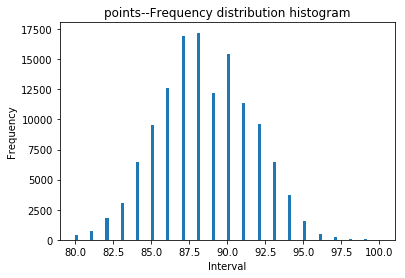

129971
120975


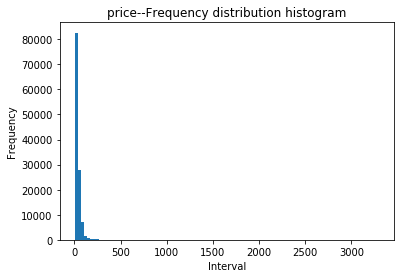

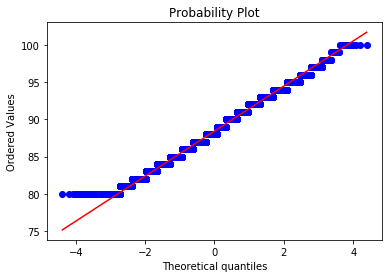

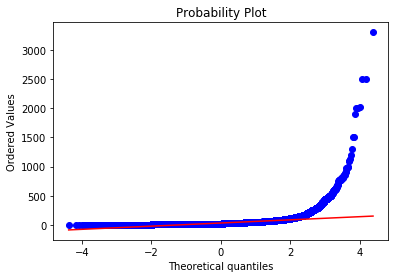

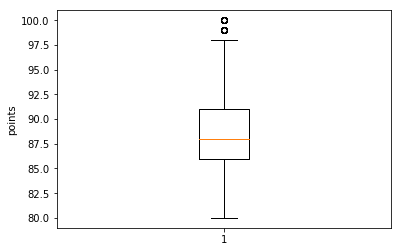

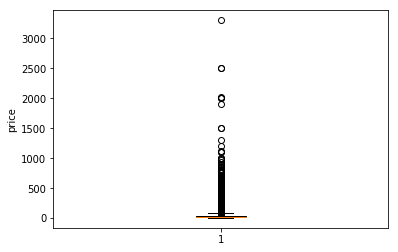

In [7]:
Numeric(pd.DataFrame(dataframe, columns=["points", "price"]))

通过可视化手段对数据进行分析，可以得出以下结论，points属性符合正态分布，离群点少；price属性明显不符合正态分布，大部分值分布在200以下，但离群点的值可以达到3300。从这个数据可以看出红酒的价格符合高端奢侈品的规律。高端货物较少但溢价很高。

通过对缺失值的统计还可以看到price的缺失值较多。可能是因为溢价过高在数据集原始处理时被当做异常值去掉。

              points          price
count  129971.000000  129971.000000
mean       88.447138      34.300005
std         3.039730      39.768715
min        80.000000       4.000000
25%        86.000000      18.000000
50%        88.000000      25.000000
75%        91.000000      40.000000
max       100.000000    3300.000000
{'col4': {'Max': 100.0, 'Min': 80.0, 'Mean': 88.44713820775404, 'Mid': 88.0, '25': 86.0, '75': 91.0, 'Nan': 0}, 'col5': {'Max': 3300.0, 'Min': 4.0, 'Mean': 34.30000538581684, 'Mid': 25.0, '25': 18.0, '75': 40.0, 'Nan': 0}}


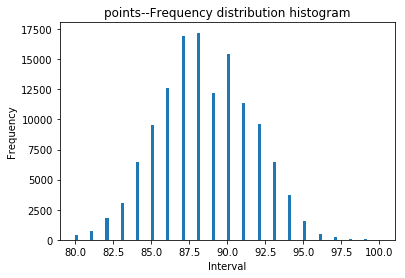

129971
129971


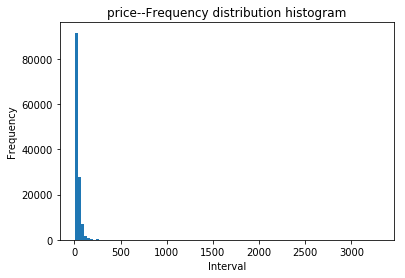

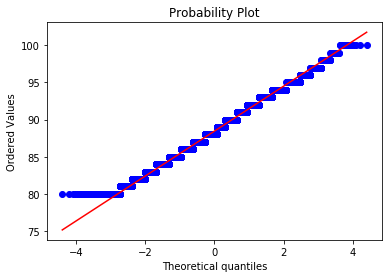

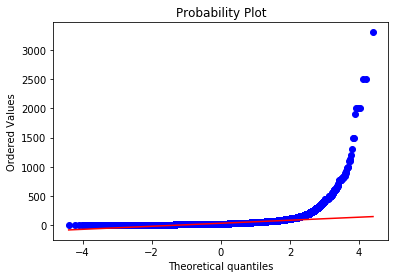

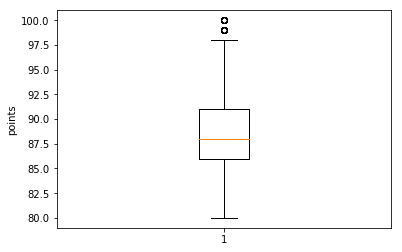

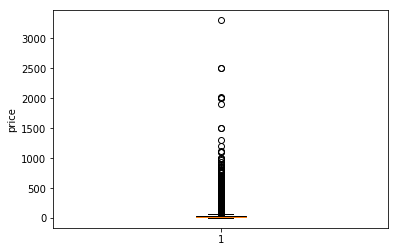

In [8]:
high_feq_process(pd.DataFrame(dataframe, columns=["points", "price"]))

              points          price
count  129971.000000  120975.000000
mean       88.447138      35.363389
std         3.039730      41.022218
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000
{'col4': {'Max': 100.0, 'Min': 80.0, 'Mean': 88.44713820775404, 'Mid': 88.0, '25': 86.0, '75': 91.0, 'Nan': 0}, 'col5': {'Max': 3300.0, 'Min': 4.0, 'Mean': 35.363389129985535, 'Mid': 25.0, '25': 17.0, '75': 42.0, 'Nan': 8996}}


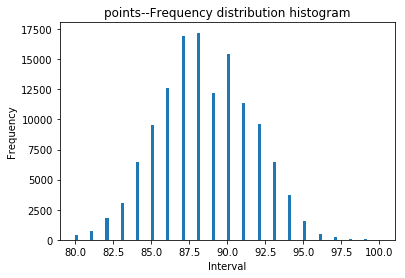

129971
120975


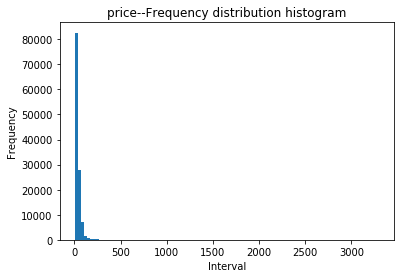

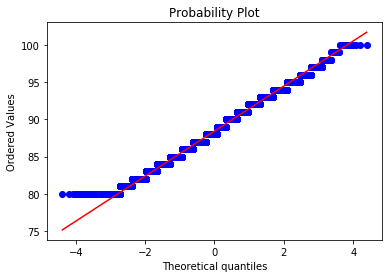

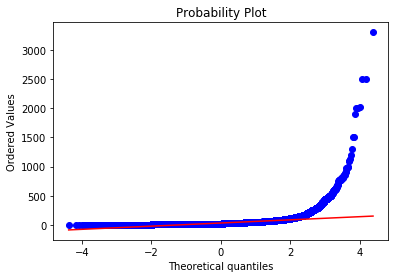

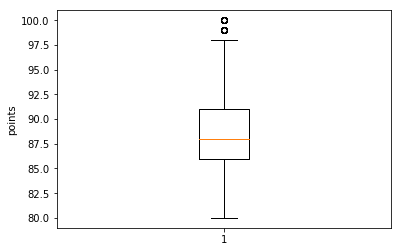

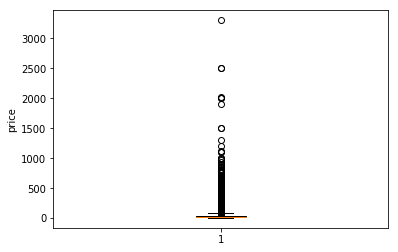

In [9]:
relation_process(pd.DataFrame(dataframe, columns=["points", "price"]))

d:\python\python36\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


              points          price
count  129971.000000  129971.000000
mean       88.447138      35.810840
std         3.039730      40.597485
min        80.000000       4.000000
25%        86.000000      17.333333
50%        88.000000      26.000000
75%        91.000000      43.000000
max       100.000000    3300.000000
{'col4': {'Max': 100.0, 'Min': 80.0, 'Mean': 88.44713820775404, 'Mid': 88.0, '25': 86.0, '75': 91.0, 'Nan': 0}, 'col5': {'Max': 3300.0, 'Min': 4.0, 'Mean': 35.81083985401871, 'Mid': 26.0, '25': 17.333333333333332, '75': 43.0, 'Nan': 0}}


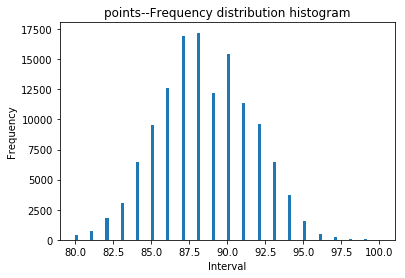

129971
129971


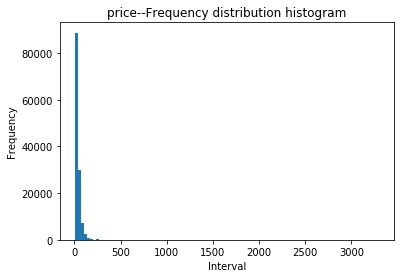

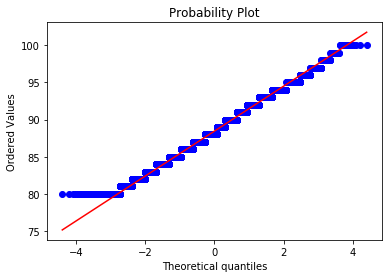

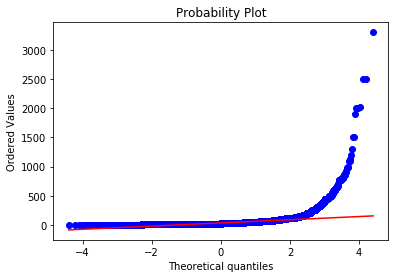

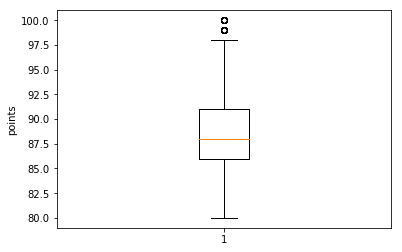

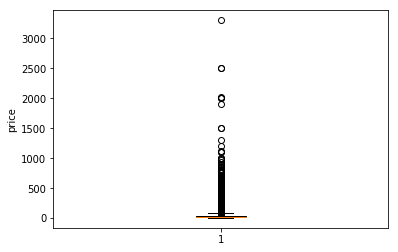

In [10]:
similarity_process(pd.DataFrame(dataframe, columns=["points", "price"]), k_num=3)

通过三种缺失值补全方法进行补全后，在可视化中并没有明显的变化，分析原因应该是因为，price的值75%都集中于42以下，补充个别的缺失值对主题分布不会起到太大的影响。

In [13]:
file2 = "./wine-reviews/winemag-data-130k-v2.csv"
dataframe2 = pd.read_csv(file2)
Nominal(dataframe2)

{'country': {'Italy': 19540,
  'Portugal': 5691,
  'US': 54504,
  'Spain': 6645,
  'France': 22093,
  'Germany': 2165,
  'Argentina': 3800,
  'Chile': 4472,
  'Australia': 2329,
  'Austria': 3345,
  'South Africa': 1401,
  'New Zealand': 1419,
  'Israel': 505,
  'Hungary': 146,
  'Greece': 466,
  'Romania': 120,
  'Mexico': 70,
  'Canada': 257,
  nan: 63,
  'Turkey': 90,
  'Czech Republic': 12,
  'Slovenia': 87,
  'Luxembourg': 6,
  'Croatia': 73,
  'Georgia': 86,
  'Uruguay': 109,
  'England': 74,
  'Lebanon': 35,
  'Serbia': 12,
  'Brazil': 52,
  'Moldova': 59,
  'Morocco': 28,
  'Peru': 16,
  'India': 9,
  'Bulgaria': 141,
  'Cyprus': 11,
  'Armenia': 2,
  'Switzerland': 7,
  'Bosnia and Herzegovina': 2,
  'Ukraine': 14,
  'Slovakia': 1,
  'Macedonia': 12,
  'China': 1,
  'Egypt': 1},
 'province': {'Sicily & Sardinia': 1797,
  'Douro': 1281,
  'Oregon': 5373,
  'Michigan': 114,
  'Northern Spain': 3851,
  'Alsace': 2440,
  'Rheinhessen': 281,
  'California': 36247,
  'Mosel': 1039,


              points          price
count  129971.000000  120975.000000
mean       88.447138      35.363389
std         3.039730      41.022218
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000
{'col4': {'Max': 100.0, 'Min': 80.0, 'Mean': 88.44713820775404, 'Mid': 88.0, '25': 86.0, '75': 91.0, 'Nan': 0}, 'col5': {'Max': 3300.0, 'Min': 4.0, 'Mean': 35.363389129985535, 'Mid': 25.0, '25': 17.0, '75': 42.0, 'Nan': 8996}}


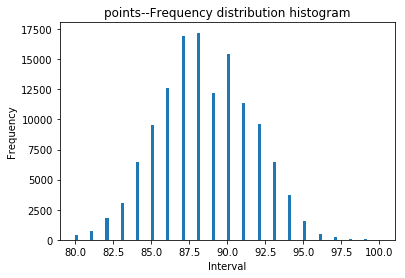

129971
120975


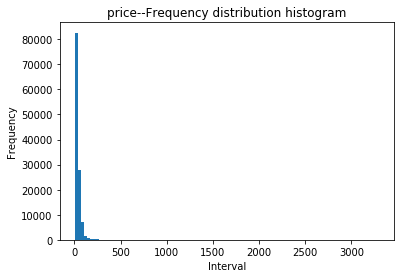

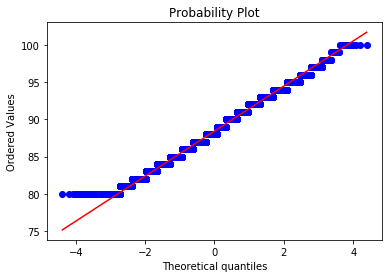

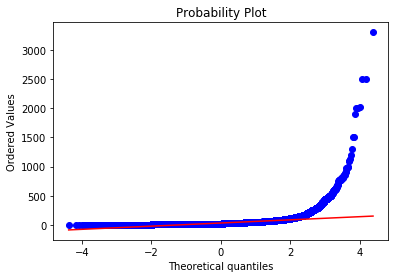

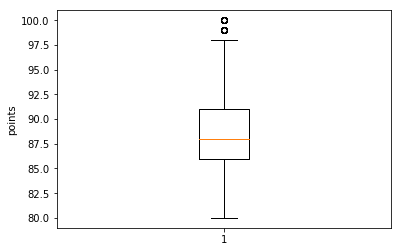

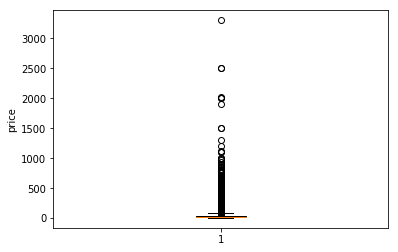

In [14]:
Numeric(pd.DataFrame(dataframe2, columns=["points", "price"]))

              points          price
count  129971.000000  129971.000000
mean       88.447138      34.300005
std         3.039730      39.768715
min        80.000000       4.000000
25%        86.000000      18.000000
50%        88.000000      25.000000
75%        91.000000      40.000000
max       100.000000    3300.000000
{'col4': {'Max': 100.0, 'Min': 80.0, 'Mean': 88.44713820775404, 'Mid': 88.0, '25': 86.0, '75': 91.0, 'Nan': 0}, 'col5': {'Max': 3300.0, 'Min': 4.0, 'Mean': 34.30000538581684, 'Mid': 25.0, '25': 18.0, '75': 40.0, 'Nan': 0}}


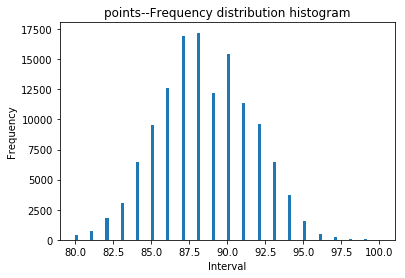

129971
129971


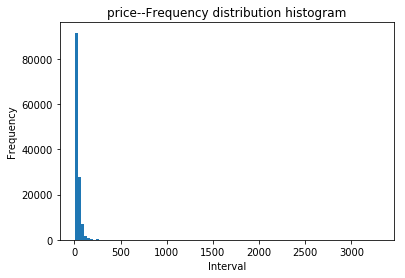

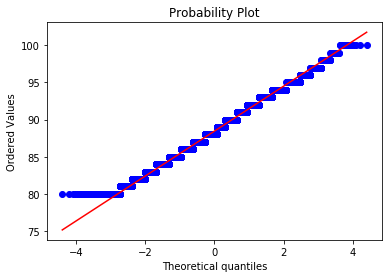

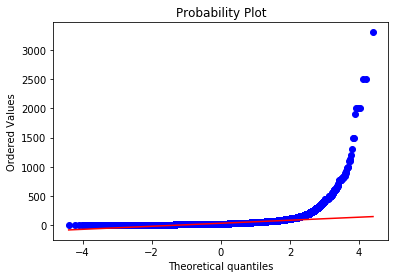

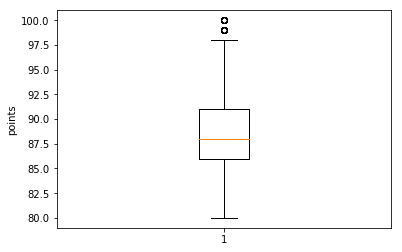

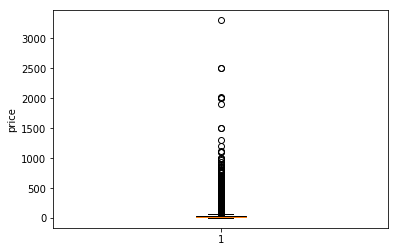

In [15]:
high_feq_process(pd.DataFrame(dataframe2, columns=["points", "price"]))

              points          price
count  129971.000000  120975.000000
mean       88.447138      35.363389
std         3.039730      41.022218
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000
{'col4': {'Max': 100.0, 'Min': 80.0, 'Mean': 88.44713820775404, 'Mid': 88.0, '25': 86.0, '75': 91.0, 'Nan': 0}, 'col5': {'Max': 3300.0, 'Min': 4.0, 'Mean': 35.363389129985535, 'Mid': 25.0, '25': 17.0, '75': 42.0, 'Nan': 8996}}


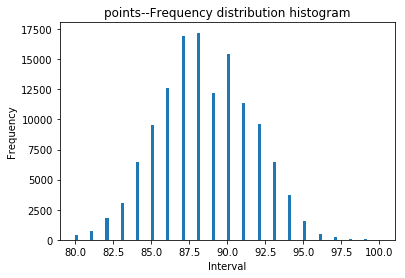

129971
120975


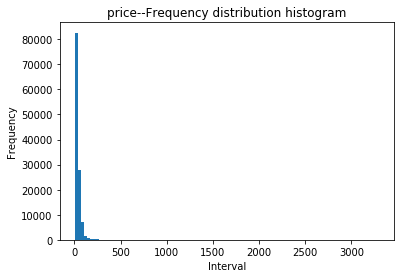

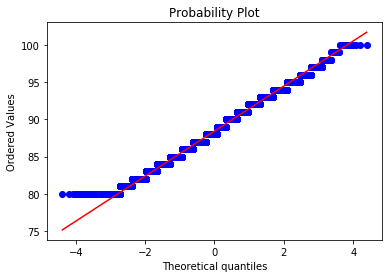

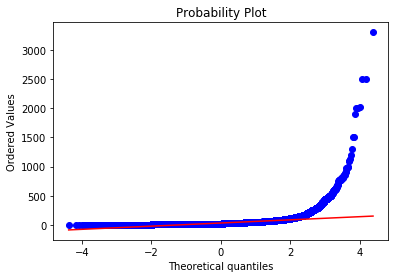

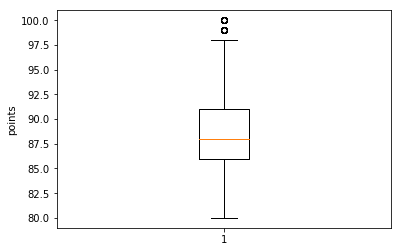

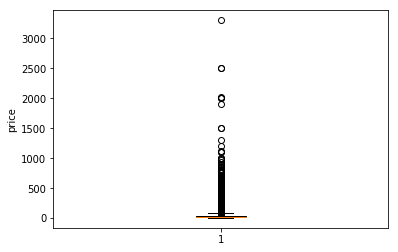

In [17]:
relation_process(pd.DataFrame(dataframe2, columns=["points", "price"]))

d:\python\python36\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


              points          price
count  129971.000000  129971.000000
mean       88.447138      35.810840
std         3.039730      40.597485
min        80.000000       4.000000
25%        86.000000      17.333333
50%        88.000000      26.000000
75%        91.000000      43.000000
max       100.000000    3300.000000
{'col4': {'Max': 100.0, 'Min': 80.0, 'Mean': 88.44713820775404, 'Mid': 88.0, '25': 86.0, '75': 91.0, 'Nan': 0}, 'col5': {'Max': 3300.0, 'Min': 4.0, 'Mean': 35.81083985401871, 'Mid': 26.0, '25': 17.333333333333332, '75': 43.0, 'Nan': 0}}


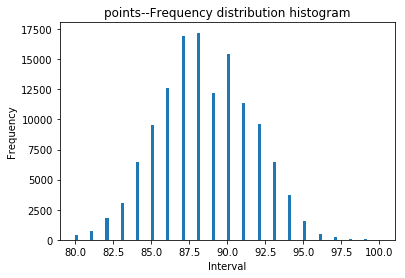

129971
129971


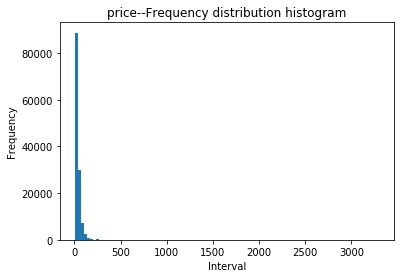

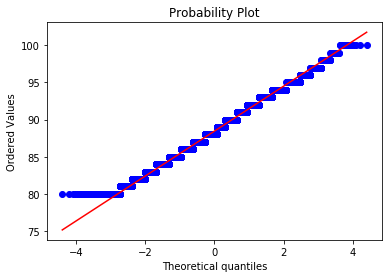

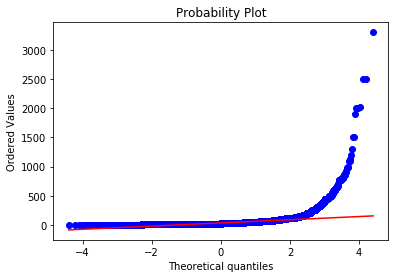

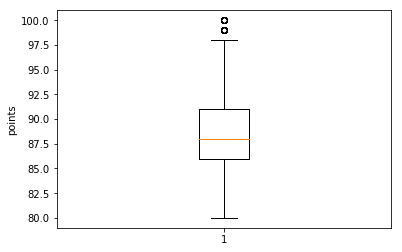

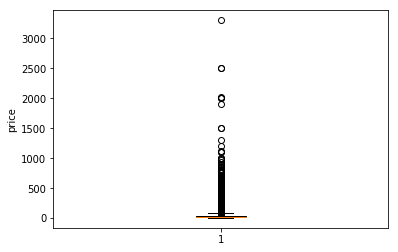

In [18]:
similarity_process(pd.DataFrame(dataframe2, columns=["points", "price"]), k_num=3)

文件“winemag-data-130k-v2.csv”的分析和结果与文件“winemag-data-130k-v2.csv”基本一致。